## Homework 5: Wilson-Cowan model

Perform the stability analysis for the Wilson-Cowan model without refractory dynamics. Set self-excitation and self inhibition to zero ($w_{EE} = w_{II} = 0$), and the $\alpha_E=\alpha_I=1$.

Optional: what is the difference if one considers also the refractory dynamics?


<img src="cowan.png" style="height:200px">

The basic idea behind the Wilson-Cowan models is to represent a population of neurons by a set of differential equations that capture the average activity of the neurons within that population. The equations of the Wilson-Cowan model are:

$$
  \left\{
  \begin{aligned}
    \frac{dx}{dt} &= -\alpha_E x + r(1-x)\phi(w_{EE} x − w_{EI} y + h_E) \\
    \frac{dy}{dt} &= -\alpha_I y + r(1-y)\phi(w_{IE} x − w_{II} y + h_I)
  \end{aligned}
  \right.
$$

where:
 - E and I represents the proportion of excitatory and inhibitory cells firing:
     - $x = n_E/V$;
     - $y = n_I / V$
 - $w_{EE}, w_{EI}, w_{IE}, w_{II}$ are the connections synaptic coupling strength between the excitatory-excitatory, excitatory-inhibitory, inhibitory-excitatory, and inhibitory-inhibitory population respectively;
 - $h_E, h_I$ correspond to constant modulatory currents that are applied to the populations;
 - $\alpha_E, \alpha_I$ model the relaxation time for both kinds of neurons;
 - $\phi$ is the activation function, expressing the nonlinearity of the interactions. Let us take for exemple a sigmoid;
 - $r(1-x)$ and $r(1-y)$ represent the refractory effect, with $r$ refractory constant.


## Wilson-Cowan model  without refractory dynamics
Let us consider the equations for the Wilson-Cowan model, without the refractory term (we set $w_{EE} = w_{II} = 0$, $\alpha_E=\alpha_I=1$) :

$$
  \left\{
  \begin{aligned}
    \frac{dx}{dt} &= - x + \phi(− w_{EI} y + h_E) = -x + \frac{1}{1+e^{− w_{EI} y + h_E}}\\
    \frac{dy}{dt} &= - y + \phi(w_{IE} x + h_I) = -y + \frac{1}{1+e^{ w_{IE} x + h_I}}
  \end{aligned}
  \right.
$$

To find the stationary points, we have to solve the system:

$$
  \left\{
  \begin{aligned}
     x &= \frac{1}{1+e^{− w_{EI} y + h_E}} \\
     y &= \frac{1}{1+e^{ w_{IE} x + h_I}} 
  \end{aligned}
  \right.
$$

The sigmoid function makes these equations nonlinear. The presence of specific symmetries or regularities is not apparent. Analytical solutions for this systems of nonlinear equations, are often not feasible or easy to find.
Therefore numerical approaches will be needed to solve this system.


For this reason, we proceed to solve the system of equations numerically using the Euler-Maruyama algorithm, first without refractory dynamics and then introducing it. In both cases, various regimes are experimented varying the chosen parameters. The obtained results are plotted on a temporal graph with inhibitory or excitatory firing rate vs simulation time. Additionally, a phase plane plot is generated, representing the system state on a graph with one axis for each variable. To complete this last plot, solutions from different initial conditions placed on a grid are included to emphasize the nature of the equilibrium point found.

$\textbf{Nonlinear system stability analysis}$ <br>
If we can identify equilibrium points and calculate Jacobians analytically, we have a powerful tool to
analyze the system for all parameter values.<br>
Given the system parameters, $w_{EE}$, $w_{II}$, $w_{IE}$, $w_{EI}$, and external currents, we numerically find the equilibrium point. To do that we rely on fsolve from scipy.optimize library.<br>
Subsequently, after evaluating numerically the Jacobian matrix at the equilibrium points, we use numeric linear algebra to calculate eigenvalues. The eigenvalues of the Jacobian give the same stability information as the roots of the characteristic equation for a linear system. The jacobian is given by:

$$
J = \left(
\begin{array}{cc}
 -1 & \frac{w_{EI} e^{h_E-w_{EI} y}}{\left(e^{h_E - w_{EI} y}+1\right)^2} \\
 -\frac{w_{IE} e^{h_I+w_{IE} x}}{\left(e^{h_I+w_{IE} x}+1\right)^2} & -1 \\
\end{array}
\right)
$$

In [1]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import math

#### Self excitation and self inhibition $\not=$ 0

Text(0.75, 0.79, '$Parameters$:\n$w_{ee}$ = 10 \n$w_{ei}$ = 12\n$w_{ie}$ = 8\n$w_{ii}$ = 3')

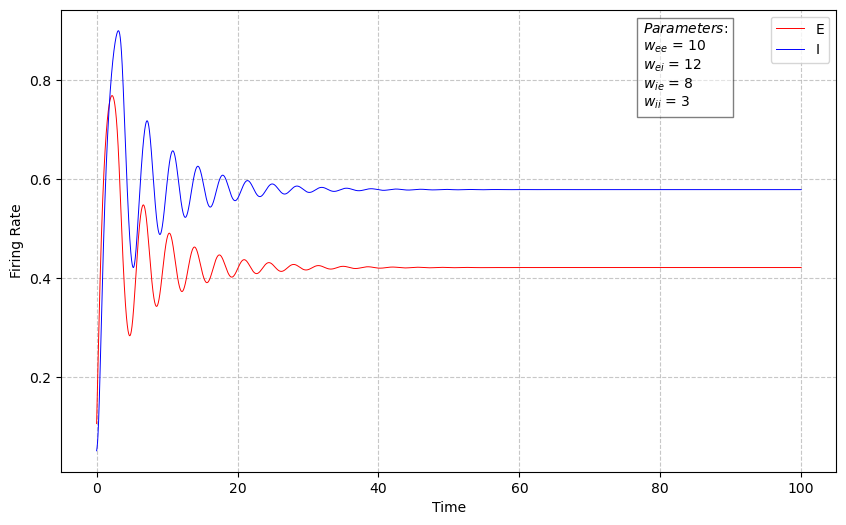

In [2]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def calculate_firing_rate(he0, hi0, t, dt, E_c, I_c, wee, wei, wie, wii):
    '''
    inputs:
        E_c,I_c: values for the firing rate at current time
        wee, wei, wie, wii: excitation and inhibition constants
        he0, hi0: external current 
        t, dt: current time of the simulation and time-step

    return:
        E_p, I_p: values for the forong rate at next time
    
    '''
    
    dE = dt * (-E_c + sigmoid((wee * E_c) - (wie * I_c) + he0))
    dI = dt * (-I_c + sigmoid((wei * E_c) - (wii * I_c) + hi0))
    E_p = E_c + dE
    I_p = I_c + dI
    return E_p, I_p

# settings
he0 = 0.1
hi0 = -3
wee = 10
wei = 12
wie = 8
wii = 3
dt = 0.01

times = np.arange(0, 100, dt)
E_p = np.zeros((len(times), 1))
I_p = np.zeros((len(times), 1))

# initial conditions
uu0 = 0.1
vv0 = 0.05

for t_idx in range(len(times)):
    t = t_idx * dt
    if t_idx == 0:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, uu0,
                                                           vv0, wee, wei, wie, wii)
    else:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                       I_p[t_idx - 1], wee, wei, wie, wii)
        
plt.figure(figsize=(10, 6))
plt.plot(times, E_p, label='E', color='red', linewidth = 0.7)
plt.plot(times, I_p, label='I', color='blue', linewidth = 0.7)
plt.xlabel('Time')
plt.ylabel('Firing Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

info_text = f'$Parameters$:\n$w_{{ee}}$ = {wee} \n$w_{{ei}}$ = {wei}\n$w_{{ie}}$ = {wie}\n$w_{{ii}}$ = {wii}'
plt.annotate(info_text, xy=(0.75, 0.79), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


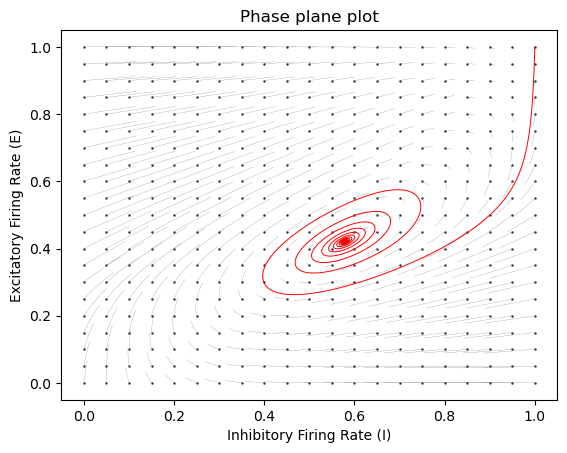

In [3]:
num_points = 20
points = [i/float(num_points) for i in range(num_points+1)]
    
for e in points:
    for i in points:
        t = 0
        dt = 0.03
        E_p[0], I_p[0] = e, i  # Use loop variables as initial conditions

        for t_idx in range(1, len(times)):
            t = t_idx * dt
            E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                             I_p[t_idx - 1], wee, wei, wie, wii)
    
        plt.plot(I_p[:5], E_p[:5], color='#111111', linewidth=0.1)
        plt.plot(i, e, color='#333333', marker='.', markersize=1.5)
        
plt.plot(I_p, E_p, color='red', linewidth=0.7)
plt.xlabel('Inhibitory Firing Rate (I)')
plt.ylabel('Excitatory Firing Rate (E)')
plt.title('Phase plane plot')
plt.show()

In [4]:
def system_equations(variables, wee, wei, wie, wii, hE, hI):
    x, y = variables
    eq1 = x - 1/(1 + np.exp(-wei*y + wee*x + hE))
    eq2 = y - 1/(1 + np.exp(-wii*y + wie*x + hI))
    return [eq1, eq2]

def jacobian_matrix(x, y, w_EE, w_II, w_IE, w_EI, h_E, h_I):
    J = np.array([
        [-1, w_EI * np.exp(h_E - w_EI * y) / (np.exp(h_E - w_EI * y) + 1)**2],
        [-w_IE * np.exp(h_I + w_IE * x) / (np.exp(h_I + w_IE * x) + 1)**2, -1]
    ])
    return J


# initial Guess
initial_guess = [1.0, 0.0]

# Fsolve
solution = fsolve(system_equations, initial_guess, args=(wee, wei, wie, wii, he0, hi0))
print("Numerical Solution:")
print("x =", solution[0])
print("y =", solution[1])

J = jacobian_matrix(solution[0], solution[1], wee, wii, wie, wei, he0, hi0)

# Find eigenvalues
eigenvalues = np.linalg.eigvals(J)
print("\nEigenvalues:\n", eigenvalues)


Numerical Solution:
x = 0.5627152016984687
y = 0.49827841362597963

Eigenvalues:
 [-1.+0.1994385j -1.-0.1994385j]


The obtained eigenvalues are complex conjugate pairs: `-1 + 0.1994385j` and `-1 - 0.1994385j`. The real part of these eigenvalues is `-1`, indicating that the system has a stable fixed point (equilibrium) because the real parts of the eigenvalues are negative.

The imaginary parts of the eigenvalues (`0.1994385j` and `-0.1994385j`) suggest that there is a damped oscillatory behavior in the system. The stability is determined by the real parts of the eigenvalues, and since they are negative, the system tends to converge towards the equilibrium point.

The phase plane plot displays a stable focus.

#### Self excitation and self inhibition $=$ 0

Text(0.87, 0.69, '$Parameters$:\n$w_{ee}$ = 0.0 \n$w_{ei}$ = 1\n$w_{ie}$ = 1\n$w_{ii}$ = 0.0')

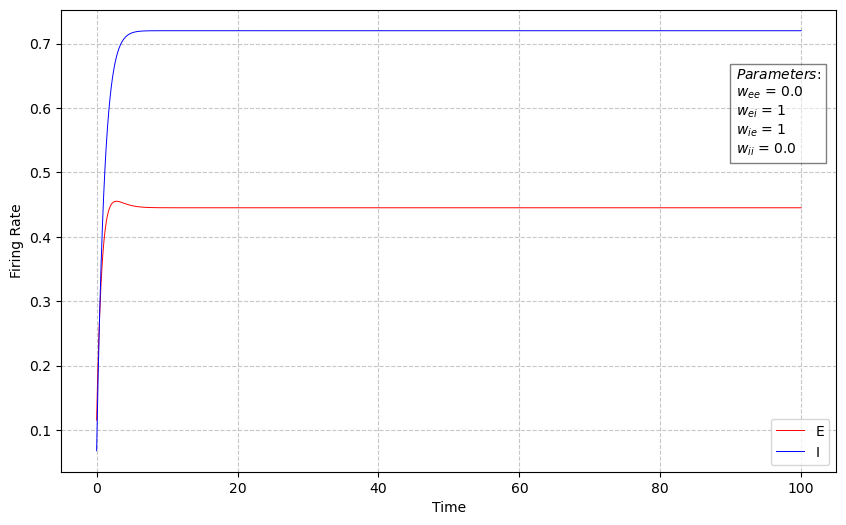

In [5]:
# Wilson-Cowan model parameters
alpha_E, alpha_I = 1.0, 1.0
hi0, he0 = -4, 0.5
hi0, he0 = 0.5,0.5
wii, wee = 0., 0.
wie, wei = 1, 1

times = np.arange(0, 100, dt)
E_p = np.zeros((len(times), 1))
I_p = np.zeros((len(times), 1))

# initial conditions
uu0 = 0.1
vv0 = 0.05

for t_idx in range(len(times)):
    t = t_idx * dt
    if t_idx == 0:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, uu0,
                                                           vv0, wee, wei, wie, wii)
    else:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                       I_p[t_idx - 1], wee, wei, wie, wii)
        
plt.figure(figsize=(10, 6))
plt.plot(times, E_p, label='E', color='red', linewidth = 0.7)
plt.plot(times, I_p, label='I', color='blue', linewidth = 0.7)
plt.xlabel('Time')
plt.ylabel('Firing Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

info_text = f'$Parameters$:\n$w_{{ee}}$ = {wee} \n$w_{{ei}}$ = {wei}\n$w_{{ie}}$ = {wie}\n$w_{{ii}}$ = {wii}'
plt.annotate(info_text, xy=(0.87, 0.69), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


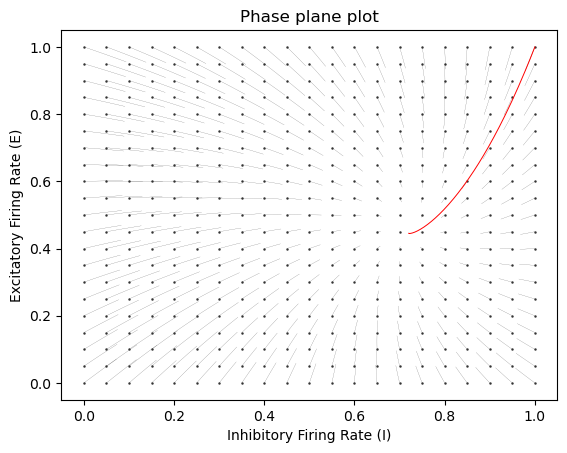

In [6]:
num_points = 20
points = [i/float(num_points) for i in range(num_points+1)]
    
for e in points:
    for i in points:
        t = 0
        dt = 0.03
        E_p[0], I_p[0] = e, i  # Use loop variables as initial conditions

        for t_idx in range(1, len(times)):
            t = t_idx * dt
            E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                             I_p[t_idx - 1], wee, wei, wie, wii)
    
        plt.plot(I_p[:5], E_p[:5], color='#111111', linewidth=0.1)
        plt.plot(i, e, color='#333333', marker='.', markersize=1.5)
        
plt.plot(I_p, E_p, color='red', linewidth=0.7)
plt.xlabel('Inhibitory Firing Rate (I)')
plt.ylabel('Excitatory Firing Rate (E)')
plt.title('Phase plane plot')
plt.show()

In [7]:
# Fsolve
solution = fsolve(system_equations, initial_guess, args=(wee, wei, wie, wii, he0, hi0))
print("Numerical Solution:")
print("x =", solution[0])
print("y =", solution[1])

J = jacobian_matrix(solution[0], solution[1], wee, wii, wie, wei, he0, hi0)

# Find eigenvalues
eigenvalues = np.linalg.eigvals(J)
print("\nEigenvalues:\n", eigenvalues)


Numerical Solution:
x = 0.4451847614905051
y = 0.27985423562235906

Eigenvalues:
 [-1.+0.22311074j -1.-0.22311074j]


The eigenvalues, `[-1 + 0.22311074j, -1 - 0.22311074j]`, are again complex conjugate pairs. The real part of these eigenvalues is -\, indicating a stable fixed point or equilibrium.

The imaginary parts `0.22311074j` and `-0.22311074j` suggest that there is a damped oscillatory behavior in the system. The fact that the real part is negative means that the system tends to converge towards the equilibrium point over time. The magnitude of the imaginary part (slightly lower than the previous case) determines the frequency of the oscillations (in this exemple is very low), and the negative sign indicates damping.

The phase plane plot displays a stable focus.

#### Self excitation and self inhibition $\not=$ 0 and other parameters..

Text(0.87, 0.69, '$Parameters$:\n$w_{ee}$ = 20 \n$w_{ei}$ = 22\n$w_{ie}$ = 16\n$w_{ii}$ = 6')

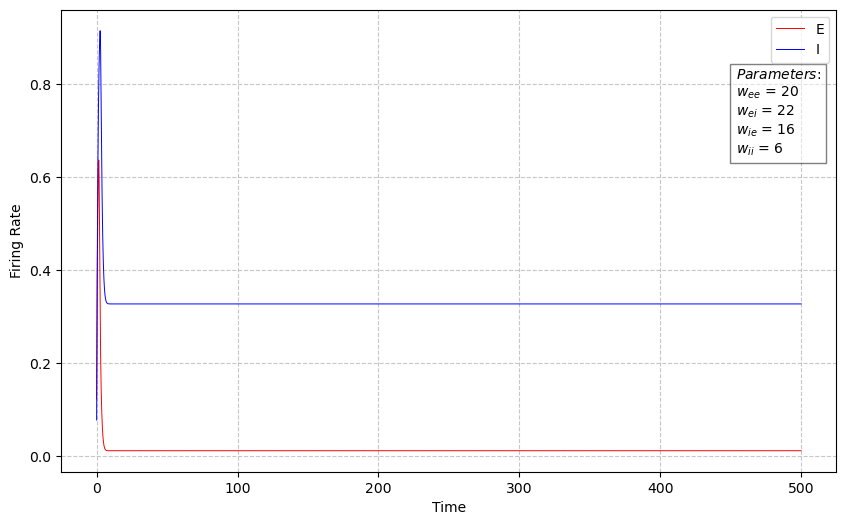

In [8]:
# Wilson-Cowan model parameters
alpha_E, alpha_I = 1.0, 1.0
hi0, he0 = 1.6, 7
hi0, he0 = 1,0.5
wii, wee = 6, 20
wie, wei = 16, 22

times = np.arange(0, 500, dt)
E_p = np.zeros((len(times), 1))
I_p = np.zeros((len(times), 1))

# initial conditions
uu0 = 0.1
vv0 = 0.05

for t_idx in range(len(times)):
    t = t_idx * dt
    if t_idx == 0:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, uu0,
                                                           vv0, wee, wei, wie, wii)
    else:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                       I_p[t_idx - 1], wee, wei, wie, wii)
        
plt.figure(figsize=(10, 6))
plt.plot(times, E_p, label='E', color='red', linewidth = 0.7)
plt.plot(times, I_p, label='I', color='blue', linewidth = 0.7)
plt.xlabel('Time')
plt.ylabel('Firing Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

info_text = f'$Parameters$:\n$w_{{ee}}$ = {wee} \n$w_{{ei}}$ = {wei}\n$w_{{ie}}$ = {wie}\n$w_{{ii}}$ = {wii}'
plt.annotate(info_text, xy=(0.87, 0.69), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


Text(0.5, 1.0, 'Phase plane plot')

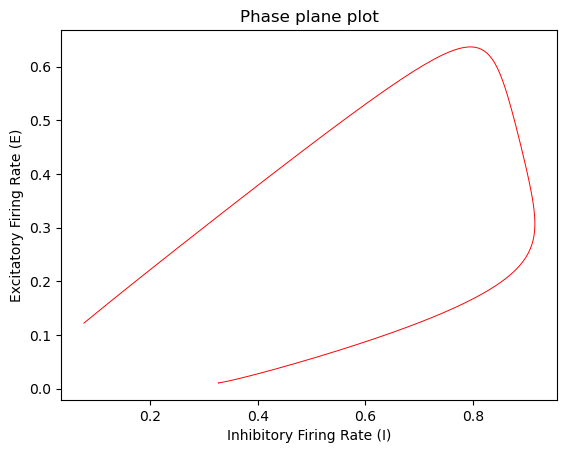

In [9]:
plt.plot(I_p, E_p, color='red', linewidth=0.7)
plt.xlabel('Inhibitory Firing Rate (I)')
plt.ylabel('Excitatory Firing Rate (E)')
plt.title('Phase plane plot')

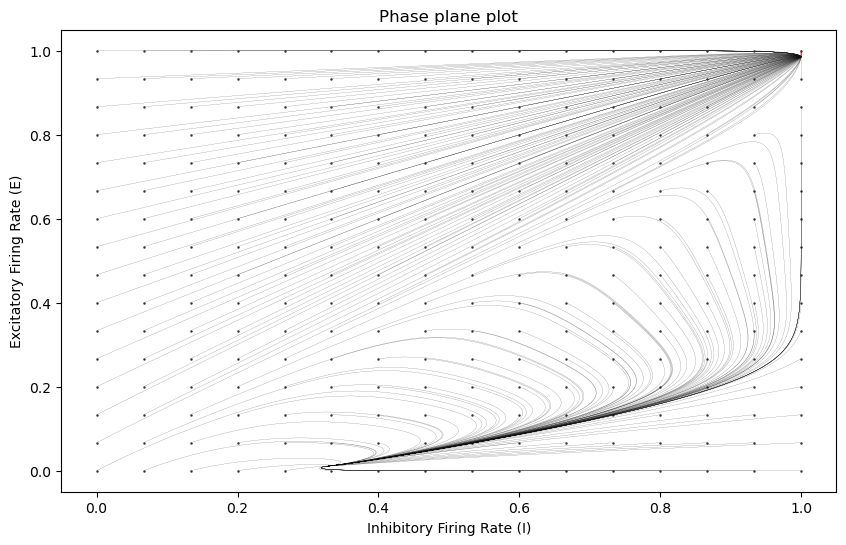

In [11]:
num_points = 15
points = [i/float(num_points) for i in range(num_points+1)]

plt.figure(figsize=(10, 6))
plt.plot(I_p, E_p, color='red', linewidth=0.7)

for e in points:
    for i in points:
        t = 0
        dt = 0.03
        E_p[0], I_p[0] = e, i  # Use loop variables as initial conditions

        for t_idx in range(1, len(times)):
            t = t_idx * dt
            E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                             I_p[t_idx - 1], wee, wei, wie, wii)
    
        plt.plot(I_p, E_p, color='#111111', linewidth=0.1)
        plt.plot(i, e, color='#333333', marker='.', markersize=1.5)
        
plt.xlabel('Inhibitory Firing Rate (I)')
plt.ylabel('Excitatory Firing Rate (E)')
plt.title('Phase plane plot')
plt.show()

In [13]:
# Fsolve
solution = fsolve(system_equations, initial_guess, args=(wee, wei, wie, wii, he0, hi0))
print("Numerical Solution:")
print("x =", solution[0])
print("y =", solution[1])

J = jacobian_matrix(solution[0], solution[1], wee, wii, wie, wei, he0, hi0)

# Find eigenvalues
eigenvalues = np.linalg.eigvals(J)
print("\nEigenvalues:\n", eigenvalues)


Numerical Solution:
x = 0.13307478815172297
y = 0.058520651723207376

Eigenvalues:
 [-1.+1.74309157j -1.-1.74309157j]


Also in that case we have the presence of complex eigenvalues with a negative real part. This indicates a stable fixed points or a stable spiral (not a limit cycle). The phase plane plot suggest that with that choiche of parameters, we are probably moving in the direction of a limit cycle.

#### Limit case: $w_{ei}$, $w{ie}$ infinity
Let us set the self excitation and self inhibition $=$ 0. <br>
Let us consider the equations for the Wilson-Cowan model, without the refractory term (we set $w_{EE} = w_{II} = 0$, $w_{IE} = w_{EI} = \infty$, $\alpha_E=\alpha_I=1$) :

$$
  \left\{
  \begin{aligned}
    \frac{dx}{dt} &= -x +1\\
    \frac{dy}{dt} &= -y 
  \end{aligned}
  \right.
$$


For this system:

$$
J =
\begin{bmatrix}
\frac{\partial}{\partial x}(-x +1) & \frac{\partial}{\partial y}(-x +1) \\
\frac{\partial}{\partial x}(-y ) & \frac{\partial}{\partial y}(-y)
\end{bmatrix}
$$

Calculating the partial derivatives:

$$
J =
\begin{bmatrix}
-1 & 0 \\
0 & -1
\end{bmatrix}
$$

So, the Jacobian matrix for the given system is a diagonal matrix with entries -1 on the main diagonal and 0 elsewhere. The eigenvalues of this matrix are -1 and -1, both with a negative real part. This indicates stable fixed points at (x, y) = (c_E, c_I), and the system does not exhibit limit cycles based on the linear stability analysis.


#### Limit case: $w_{ei}$, $w{ie}$ zero
Let us set the self excitation and self inhibition $=$ 0. <br>
Let us consider the equations for the Wilson-Cowan model, without the refractory term (we set $w_{EE} = w_{II} = 0$, $w_{IE} = w_{EI} = 0$, $\alpha_E=\alpha_I=1$) :

$$
  \left\{
  \begin{aligned}
    \frac{dx}{dt} &= - x + \phi(h_E) = -x + \frac{1}{1+e^{h_E}}\\
    \frac{dy}{dt} &= - y + \phi(h_I) = -y + \frac{1}{1+e^{h_I}}
  \end{aligned}
  \right.
$$


For this system:

$$
J =
\begin{bmatrix}
\frac{\partial}{\partial x}\left(-x + \frac{1}{1 + e^{h_E}}\right) & \frac{\partial}{\partial y}\left(-x + \frac{1}{1 + e^{h_E}}\right) \\
\frac{\partial}{\partial x}\left(-y + \frac{1}{1 + e^{h_I}}\right) & \frac{\partial}{\partial y}\left(-y + \frac{1}{1 + e^{h_I}}\right)
\end{bmatrix}
$$

Now, calculate the partial derivatives:

$$
J =
\begin{bmatrix}
-1   & 0 \\
0 & -1 
\end{bmatrix}
$$

The Jacobian matrix has eigenvalues `[-1, -1]`, both of which have a negative real part. Negative real parts of eigenvalues indicate stable equilibrium points. The system described by this Jacobian matrix will exhibit stable behavior, and trajectories starting near the equilibrium point will converge towards that point over time. We can conclude that the equilibrium point of the system is stable.

Text(0.75, 0.79, '$Parameters$:\n$w_{ee}$ = 0 \n$w_{ei}$ = 0\n$w_{ie}$ = 0\n$w_{ii}$ = 0')

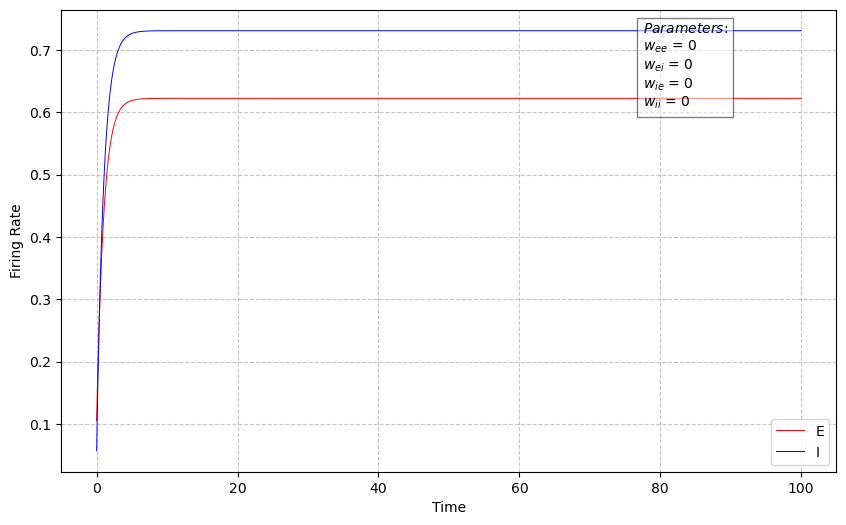

In [49]:
# settings
he0 = 0.5
hi0 = 1
wee = 0
wei = 0
wie = 0
wii = 0
dt = 0.01

times = np.arange(0, 100, dt)
E_p = np.zeros((len(times), 1))
I_p = np.zeros((len(times), 1))

# initial conditions
uu0 = 0.1
vv0 = 0.05

for t_idx in range(len(times)):
    t = t_idx * dt
    if t_idx == 0:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, uu0,
                                                           vv0, wee, wei, wie, wii)
    else:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                       I_p[t_idx - 1], wee, wei, wie, wii)
        
plt.figure(figsize=(10, 6))
plt.plot(times, E_p, label='E', color='red', linewidth = 0.7)
plt.plot(times, I_p, label='I', color='blue', linewidth = 0.7)
plt.xlabel('Time')
plt.ylabel('Firing Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

info_text = f'$Parameters$:\n$w_{{ee}}$ = {wee} \n$w_{{ei}}$ = {wei}\n$w_{{ie}}$ = {wie}\n$w_{{ii}}$ = {wii}'
plt.annotate(info_text, xy=(0.75, 0.79), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


Text(0.5, 1.0, 'Phase plane plot')

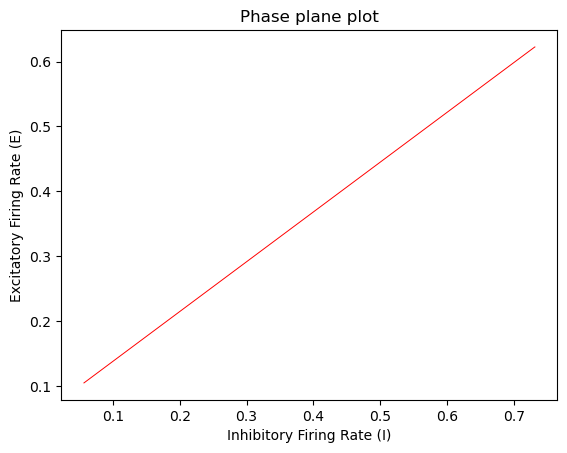

In [50]:
plt.plot(I_p, E_p, color='red', linewidth=0.7)
plt.xlabel('Inhibitory Firing Rate (I)')
plt.ylabel('Excitatory Firing Rate (E)')
plt.title('Phase plane plot')

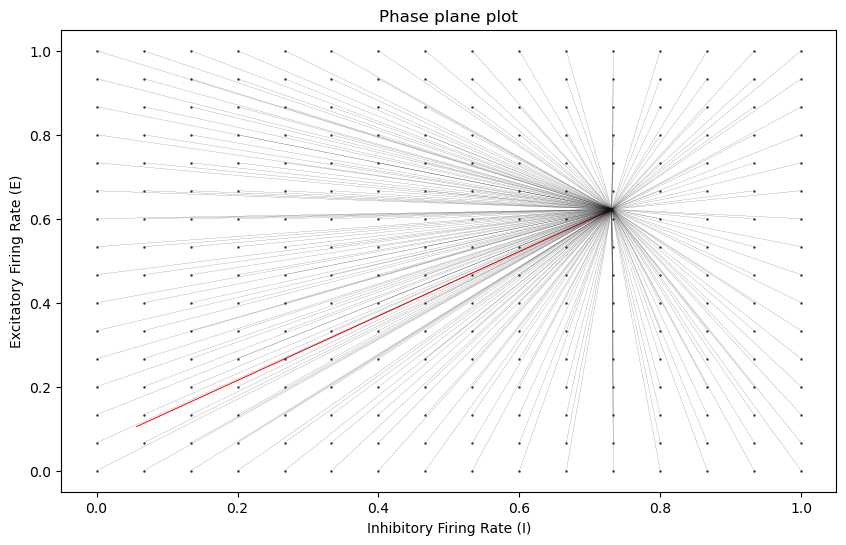

In [51]:
num_points = 15
points = [i/float(num_points) for i in range(num_points+1)]

plt.figure(figsize=(10, 6))
plt.plot(I_p, E_p, color='red', linewidth=0.7)

for e in points:
    for i in points:
        t = 0
        dt = 0.03
        E_p[0], I_p[0] = e, i  # Use loop variables as initial conditions

        for t_idx in range(1, len(times)):
            t = t_idx * dt
            E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                             I_p[t_idx - 1], wee, wei, wie, wii)
    
        plt.plot(I_p, E_p, color='#111111', linewidth=0.1)
        plt.plot(i, e, color='#333333', marker='.', markersize=1.5)
        
plt.xlabel('Inhibitory Firing Rate (I)')
plt.ylabel('Excitatory Firing Rate (E)')
plt.title('Phase plane plot')
plt.show()

In [53]:
# Fsolve
solution = fsolve(system_equations, initial_guess, args=(wee, wei, wie, wii, he0, hi0))
print("Numerical Solution:")
print("x =", solution[0])
print("y =", solution[1])

Numerical Solution:
x = 0.3775406687981454
y = 0.2689414213699951


### Wilson-Cowan model  with refractory dynamics
### self excitation and self inhibition $\not=$ 0 

Let us consider the equations for the Wilson-Cowan model, with the refractory term (we set $w_{EE} = w_{II} = 0$, $\alpha_E=\alpha_I=1$) :

$$
  \left\{
  \begin{aligned}
    \frac{dx}{dt} &= - x + r(1-x)\phi(− w_{EI} y + h_E) = -x + \frac{1}{1+e^{− w_{EI} y + h_E}}\\
    \frac{dy}{dt} &= - y + r(1-y)\phi(w_{IE} x + h_I) = -y + \frac{1}{1+e^{ w_{IE} x + h_I}}
  \end{aligned}
  \right.
$$

To find the stationary points, we have to solve the system:

$$
  \left\{
  \begin{aligned}
     x &= r(1-x)\frac{1}{1+e^{− w_{EI} y + h_E}} \\
     y &= r(1-y)\frac{1}{1+e^{ w_{IE} x + h_I}} 
  \end{aligned}
  \right.
$$

The jacobian of the sistem is:

$$J =
\left(
\begin{array}{cc}
 -\frac{r}{e^{\text{he}-\text{wei} y}+1}-1 & \frac{r \text{wei} (1-x) e^{\text{he}-\text{wei} y}}{\left(e^{\text{he}-\text{wei} y}+1\right)^2} \\
 -\frac{r \text{wie} (1-y) e^{\text{hi}+\text{wie} x}}{\left(e^{\text{hi}+\text{wie} x}+1\right)^2} & -\frac{r}{e^{\text{hi}+\text{wie} x}+1}-1 \\
\end{array}
\right)
$$

As shown below, the parameter regime I experimented with, shows no significant differences between the system with or without refractory dynamics, except for the limit case of $w_{ei}, w_{ie}$ sento to zero or to infinity.

Text(0.75, 0.79, '$Parameters$:\n$w_{ee}$ = 0 \n$w_{ei}$ = 12\n$w_{ie}$ = 8\n$w_{ii}$ = 0')

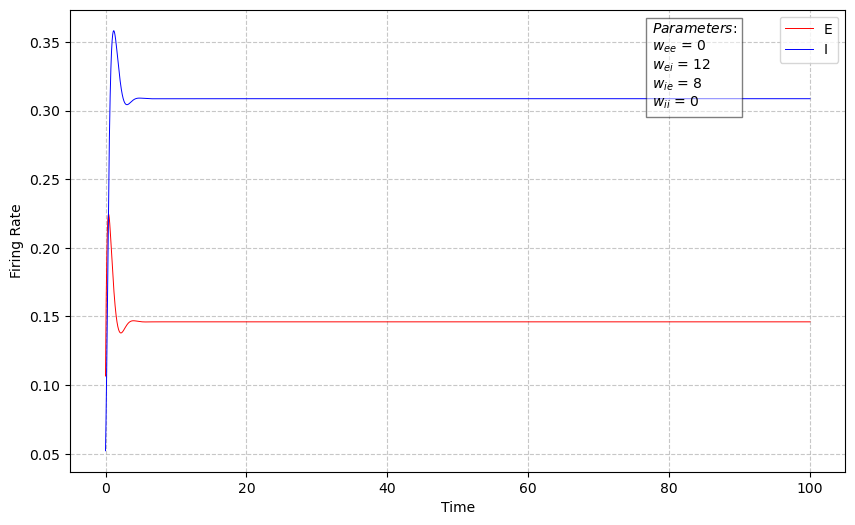

In [27]:
def calculate_firing_rate(he0, hi0, t, dt, E_c, I_c, r, wee, wei, wie, wii):
    '''
    inputs:
        E_c,I_c: values for the firing rate at current time
        wee, wei, wie, wii: excitation and inhibition constants
        he0, hi0: external current 
        t, dt: current time of the simulation and time-step

    return:
        E_p, I_p: values for the forong rate at next time
    
    '''
    
    dE = dt * (-E_c + r*(1-E_c)*sigmoid((wee * E_c) - (wie * I_c) + he0))
    dI = dt * (-I_c + r*(1-I_c)*sigmoid((wei * E_c) - (wii * I_c) + hi0))
    E_p = E_c + dE
    I_p = I_c + dI
    return E_p, I_p

# settings
he0 = 0.1
hi0 = -3
wee = 0
wei = 12
wie = 8
wii = 0
r = 2
dt = 0.01

times = np.arange(0, 100, dt)
E_p = np.zeros((len(times), 1))
I_p = np.zeros((len(times), 1))

# initial conditions
uu0 = 0.1
vv0 = 0.05

for t_idx in range(len(times)):
    t = t_idx * dt
    if t_idx == 0:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, uu0,
                                                           vv0, r, wee, wei, wie, wii)
    else:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                       I_p[t_idx - 1], r, wee, wei, wie, wii)
        
plt.figure(figsize=(10, 6))
plt.plot(times, E_p, label='E', color='red', linewidth = 0.7)
plt.plot(times, I_p, label='I', color='blue', linewidth = 0.7)
plt.xlabel('Time')
plt.ylabel('Firing Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

info_text = f'$Parameters$:\n$w_{{ee}}$ = {wee} \n$w_{{ei}}$ = {wei}\n$w_{{ie}}$ = {wie}\n$w_{{ii}}$ = {wii}'
plt.annotate(info_text, xy=(0.75, 0.79), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


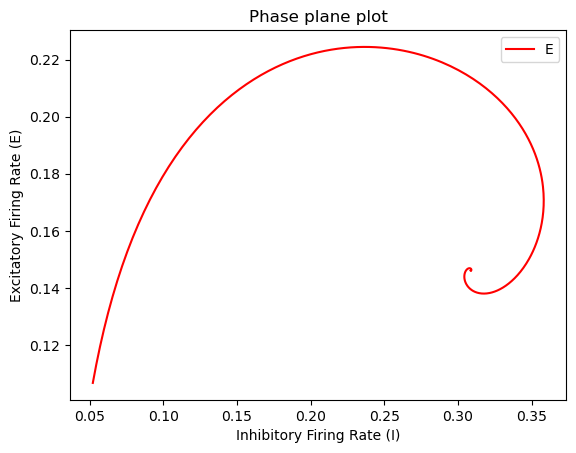

In [28]:
plt.figure()
plt.plot(I_p, E_p, label='E', color='red')
plt.xlabel('Inhibitory Firing Rate (I)')
plt.ylabel('Excitatory Firing Rate (E)')
plt.title('Phase plane plot')
plt.legend()

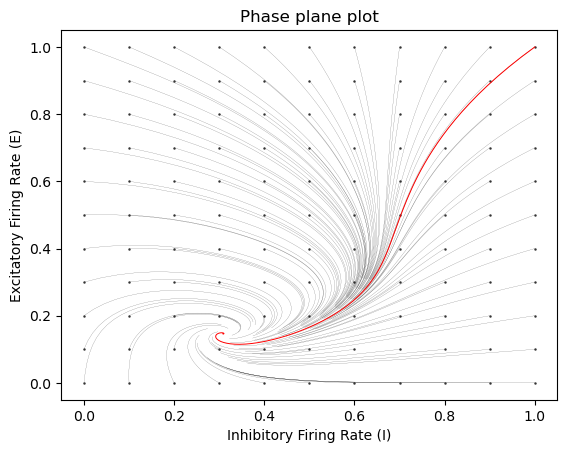

In [23]:
num_points = 10
points = [i/float(num_points) for i in range(num_points+1)]

for e in points:
    for i in points:
        t = 0
        dt = 0.03
        E_p[0], I_p[0] = e, i  # Use loop variables as initial conditions

        for t_idx in range(1, len(times)):
            t = t_idx * dt
            E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                             I_p[t_idx - 1], r, wee, wei, wie, wii)
    
        plt.plot(I_p[:40], E_p[:40], color='#111111', linewidth=0.1)
        plt.plot(i, e, color='#333333', marker= '.', markersize=1.5)
        
plt.plot(I_p, E_p, color='red', linewidth=0.7)
plt.xlabel('Inhibitory Firing Rate (I)')
plt.ylabel('Excitatory Firing Rate (E)')
plt.title('Phase plane plot')
plt.show()

In [29]:
# Fsolve
solution = fsolve(system_equations, initial_guess, args=(wee, wei, wie, wii, he0, hi0))
print("Numerical Solution:")
print("x =", solution[0])
print("y =", solution[1])


def jacobian_matrix(x, y, r, he, wei, hi, wie):
    J = np.array([
        [-r / (np.exp(he - wei * y) + 1) - 1, r * wei * (1 - x) * np.exp(he - wei * y) / (np.exp(he - wei * y) + 1)**2],
        [-r * wie * (1 - y) * np.exp(hi + wie * x) / (np.exp(hi + wie * x) + 1)**2, -r / (np.exp(hi + wie * x) + 1) - 1]
    ])
    return J

J = jacobian_matrix(solution[0], solution[1], r, he0, wei, hi0, wie)

# Find eigenvalues
eigenvalues = np.linalg.eigvals(J)
print("\nEigenvalues:\n", eigenvalues)


Numerical Solution:
x = 0.6894245420186368
y = 0.07478586333117622

Eigenvalues:
 [-1.76421041+1.12115467j -1.76421041-1.12115467j]


The eigenvalues ` [-1.76421041+1.12115467j -1.76421041-1.12115467j]` are a complex conjugate pair. The negative real part indicates a stable system. The imaginary parts suggest a damped oscillatory behavior. The phase plane plot displays a stable focus.

#### Limit case: $w_{ei}$, $w{ie}$ infinity
Let us set the self excitation and self inhibition $=$ 0. <br>
Let us consider the equations for the Wilson-Cowan model, without the refractory term (we set $w_{EE} = w_{II} = 0$, $w_{IE} = w_{EI} = \infty$, $\alpha_E=\alpha_I=1$) :

$$
  \left\{
  \begin{aligned}
    \frac{dx}{dt} &= -x +r(1-x)\\
    \frac{dy}{dt} &= -y +r(1-y)
  \end{aligned}
  \right.
$$

The Jacobian matrix J is given by:

$$
J =
\begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix}
$$


For this system:

$$
J =
\begin{bmatrix}
\frac{\partial}{\partial x}(-x + r(1-x)) & \frac{\partial}{\partial y}(-x + r(1-x)) \\
\frac{\partial}{\partial x}(-y + r(1-y)) & \frac{\partial}{\partial y}(-y + r(1-y))
\end{bmatrix}
$$

Now, calculate the partial derivatives:

$$
J =
\begin{bmatrix}
-1-r & 0 \\
0 & -1-r
\end{bmatrix}
$$

So, the Jacobian matrix for the given system is a diagonal matrix with entries -1-r on the main diagonal and 0 elsewhere. 

#### Limit case: $w_{ei}$, $w{ie}$ zero
Let us set the self excitation and self inhibition $=$ 0. <br>
Let us consider the equations for the Wilson-Cowan model, without the refractory term (we set $w_{EE} = w_{II} = 0$, $w_{IE} = w_{EI} = 0$, $\alpha_E=\alpha_I=1$) :

$$
  \left\{
  \begin{aligned}
    \frac{dx}{dt} &= - x + \phi(h_E) = -x + \frac{r(1-x)}{1+e^{h_E}}\\
    \frac{dy}{dt} &= - y + \phi(h_I) = -y + \frac{r(1-y)}{1+e^{h_I}}
  \end{aligned}
  \right.
$$


For this system:

$$
J =
\begin{bmatrix}
\frac{\partial}{\partial x}\left(-x + \frac{r(1-x)}{1 + e^{h_E}}\right) & \frac{\partial}{\partial y}\left(-x + \frac{r(1-x)}{1 + e^{h_E}}\right) \\
\frac{\partial}{\partial x}\left(-y + \frac{r(1-y)}{1 + e^{h_I}}\right) & \frac{\partial}{\partial y}\left(-y + \frac{r(1-y)}{1 + e^{h_I}}\right)
\end{bmatrix}
$$

Now, calculate the partial derivatives:

$$
J =
\begin{bmatrix}
-1 + \frac{r e^{h_E}}{(1 + e^{h_E})^2} & 0 \\
0 & -1 + \frac{r e^{h_I}}{(1 + e^{h_I})^2}
\end{bmatrix}
$$


Text(0.75, 0.79, '$Parameters$:\n$w_{ee}$ = 0 \n$w_{ei}$ = 0\n$w_{ie}$ = 0\n$w_{ii}$ = 0')

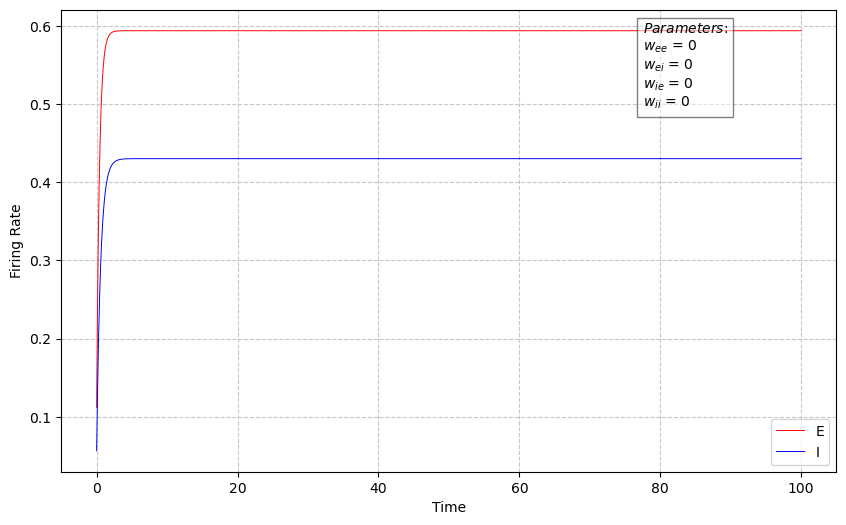

In [54]:
# settings
he0 = 1
hi0 = -0.5
wee = 0
wei = 0
wie = 0
wii = 0
r = 2
dt = 0.01

times = np.arange(0, 100, dt)
E_p = np.zeros((len(times), 1))
I_p = np.zeros((len(times), 1))

# initial conditions
uu0 = 0.1
vv0 = 0.05

for t_idx in range(len(times)):
    t = t_idx * dt
    if t_idx == 0:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, uu0,
                                                           vv0, r, wee, wei, wie, wii)
    else:
        E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                       I_p[t_idx - 1], r, wee, wei, wie, wii)
        
plt.figure(figsize=(10, 6))
plt.plot(times, E_p, label='E', color='red', linewidth = 0.7)
plt.plot(times, I_p, label='I', color='blue', linewidth = 0.7)
plt.xlabel('Time')
plt.ylabel('Firing Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

info_text = f'$Parameters$:\n$w_{{ee}}$ = {wee} \n$w_{{ei}}$ = {wei}\n$w_{{ie}}$ = {wie}\n$w_{{ii}}$ = {wii}'
plt.annotate(info_text, xy=(0.75, 0.79), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


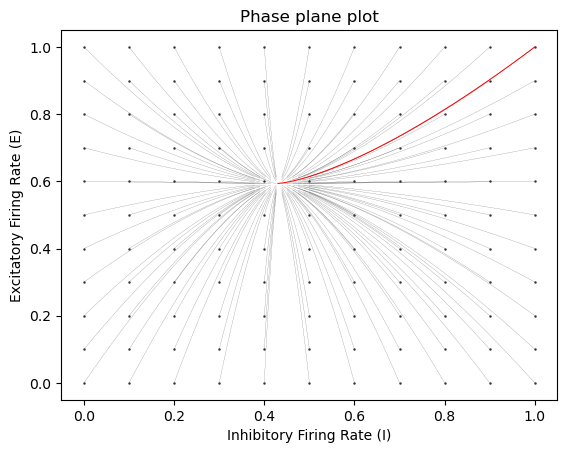

In [55]:
num_points = 10
points = [i/float(num_points) for i in range(num_points+1)]

for e in points:
    for i in points:
        t = 0
        dt = 0.03
        E_p[0], I_p[0] = e, i  # Use loop variables as initial conditions

        for t_idx in range(1, len(times)):
            t = t_idx * dt
            E_p[t_idx], I_p[t_idx] = calculate_firing_rate(he0, hi0, t, dt, E_p[t_idx - 1],
                                                             I_p[t_idx - 1], r, wee, wei, wie, wii)
    
        plt.plot(I_p[:40], E_p[:40], color='#111111', linewidth=0.1)
        plt.plot(i, e, color='#333333', marker= '.', markersize=1.5)
        
plt.plot(I_p, E_p, color='red', linewidth=0.7)
plt.xlabel('Inhibitory Firing Rate (I)')
plt.ylabel('Excitatory Firing Rate (E)')
plt.title('Phase plane plot')
plt.show()

In [58]:
# Fsolve
solution = fsolve(system_equations, initial_guess, args=(wee, wei, wie, wii, he0, hi0))
print("Numerical Solution:")
print("x =", solution[0])
print("y =", solution[1])


def jacobian_matrix(r, h_E, h_I):
    df1_dx = -1 + r * np.exp(h_E) / (1 + np.exp(h_E))**2
    df2_dy = -1 + r * np.exp(h_I) / (1 + np.exp(h_I))**2

    J = np.array([
        [df1_dx, 0],
        [0, df2_dy]
    ])

    return J

J = jacobian_matrix(r, he0, hi0)

# Find eigenvalues
eigenvalues = np.linalg.eigvals(J)
print("\nEigenvalues:\n", eigenvalues)


Numerical Solution:
x = 0.2689414213699951
y = 0.6224593312018546

Eigenvalues:
 [-0.60677613 -0.52999258]


Based on the given Jacobian matrix, one can conclude that the equilibrium point of the system is stable.